# 🎮 Proyecto Final - Análisis Exploratorio de Videojuegos en Metacritic  
📅 Fecha: Mayo 2025  
👨‍💻 Autor: Cristian Emanuel Campos Fuentes    
📬 Contacto: cristianemanuelcamposfuentes@hotmail.com   
🔗 Portfolio: [Github](https://github.com/CristianEmanuelCamposFuentes)





---



## Intro
La industria de los videojuegos ha experimentado un crecimiento explosivo en las últimas décadas, con Metacritic como uno de los principales sitios de referencia de opiniones tanto de críticos como de usuarios. Este análisis exploratorio busca investigar qué variables pueden estar asociadas a las puntuaciones que reciben los videojuegos. Se explorarán factores como el género, la plataforma y el año de lanzamiento, entre otros.


## Motivación y Audiencia
Este proyecto está dirigido a:

*   Jugadores que buscan recomendaciones basadas en datos.
*   Desarrolladores y publishers interesados en entender qué factores podrían mejorar la recepción de sus juegos.

## Contexto Comercial / Analítico
Las puntuaciones de Metacritic influyen directamente en las ventas y la reputación de los videojuegos. Comprender los patrones que subyacen a estas calificaciones puede ofrecer insights relevantes para el desarrollo y el marketing de nuevos títulos.



## Hipótesis
- Hipótesis 1: Los juegos RPG reciben mayores puntajes promedio que otros géneros.
- Hipótesis 2: Existe una correlación significativa entre el puntaje de críticos y usuarios.
- Hipótesis 3: Las plataformas influyen en la recepción crítica de un juego.
- Hipótesis 4: El año de lanzamiento tiene un impacto en la puntuación promedio.








---



## Dataset


[Link al Dataset alojado en Google Drive](https://drive.google.com/file/d/1xqIpLEr5N1ja4NETXp40WhUDLtGqo9Oy/view?usp=drive_link
)



---



## Objetivo
Realizar un análisis exploratorio que permita identificar patrones relevantes entre las variables del dataset de Metacritic y las puntuaciones de los videojuegos.



---



# Lectura inicial de datos y configuración inicial

## Librerias necesarias para el analisis de datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Configuración general de gráficos
%matplotlib inline
sns.set(style="whitegrid")

warnings.filterwarnings('ignore')

In [2]:
# Configurar el entorno de Python en Google Colab
from google.colab import drive
# Montar drive para poder acceder a los archivos como un disco virtual
drive.mount("/content/drive")
print(os.getcwd())

# Cambiar el directorio de trabajo
os.chdir('/content/drive/My Drive/CODERHOUSE/Data Science I/')

# Cargar dataset
df = pd.read_csv('dataset_metacritic_2025.csv')

# Primer vistazo
df.head()

ModuleNotFoundError: No module named 'google.colab'



---



In [ ]:
# Mostrar las ultimas filas
df.tail()

,title,genres/0,metascore,publisherName,publisherUrl,releaseDate,section,summary,type,url,...,xboxSeriesXUserReviews/score,xboxSeriesXUserReviews/url,xboxUserReviews/name,xboxUserReviews/negativeCount,xboxUserReviews/neutralCount,xboxUserReviews/normalizedScore,xboxUserReviews/positiveCount,xboxUserReviews/reviewCount,xboxUserReviews/score,xboxUserReviews/url
13424,Family Party: 30 Great Games Obstacle Arcade,Party,11,D3Publisher,https://www.metacritic.com/company/d3publisher/,2012-12-04,Wii U,Family Party: 30 Great Games Obstacle Arcade b...,game,https://www.metacritic.com/game/family-party-3...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13425,Monster Hunter Wilds,Action RPG,tbd,Capcom,https://www.metacritic.com/company/capcom/,2025-02-28,PC,Monster Hunter Wilds is the latest title in th...,game,https://www.metacritic.com/game/monster-hunter...,...,NaN,https://www.metacritic.com/game/monster-hunter...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13426,SPOGS Racing,Auto Racing,18,D2C Games,https://www.metacritic.com/company/d2c-games/,2008-07-07,Wii,[WiiWare] Race along in distinctively unique ...,game,https://www.metacritic.com/game/spogs-racing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13427,Ride to Hell: Retribution,Action Adventure,19,Deep Silver,https://www.metacritic.com/company/deep-silver/,2013-06-25,Xbox 360,The game is set in the last years of the roari...,game,https://www.metacritic.com/game/ride-to-hell-r...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13428,Vroom in the Night Sky,Biking,17,Poisoft,https://www.metacritic.com/company/poisoft/,2017-04-05,Nintendo Switch,Vroom in the night sky is a magical bike actio...,game,https://www.metacritic.com/game/vroom-in-the-n...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




---



##  Exploración inicial del dataset (Tamaño, Estructura y Estadísticas)

In [ ]:
# Dimensiones del dataset
df.shape

(13429, 308)

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13429 entries, 0 to 13428
Columns: 308 entries, title to xboxUserReviews/url
dtypes: float64(214), object(94)
memory usage: 31.6+ MB


 Se observan muchos tipos `object`, lo cual sugiere que habrá que convertir varios valores a categorías o numéricos para poder usarlos en modelos de Machine Learning.




---



### Descripcion de variables


In [ ]:
# Revisión general de columnas y tipos de datos
df.columns

Index(['title', 'genres/0', 'metascore', 'publisherName', 'publisherUrl',
       'releaseDate', 'section', 'summary', 'type', 'url',
       ...
       'xboxSeriesXUserReviews/score', 'xboxSeriesXUserReviews/url',
       'xboxUserReviews/name', 'xboxUserReviews/negativeCount',
       'xboxUserReviews/neutralCount', 'xboxUserReviews/normalizedScore',
       'xboxUserReviews/positiveCount', 'xboxUserReviews/reviewCount',
       'xboxUserReviews/score', 'xboxUserReviews/url'],
      dtype='object', length=308)

 El dataset contiene 13.429 registros y 308 columnas. Esto indica una estructura con muchas variables, ideal para aplicar técnicas de selección de características más adelante.



#### Estadísticas básicas de variables numéricas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
3DsUserReviews/negativeCount,462.0,1.469697,2.794896,0.0000,0.000000,0.00000,2.000000,22.0000
3DsUserReviews/neutralCount,462.0,9.404762,9.337874,0.0000,3.000000,6.00000,13.000000,51.0000
3DsUserReviews/normalizedScore,426.0,69.153162,12.505977,23.4286,61.856075,70.85855,78.284975,94.2035
3DsUserReviews/positiveCount,462.0,14.387446,19.234011,0.0000,1.000000,5.00000,19.000000,85.0000
3DsUserReviews/reviewCount,462.0,25.409091,21.746702,1.0000,8.000000,17.00000,37.000000,91.0000
...,...,...,...,...,...,...,...,...
xboxUserReviews/neutralCount,816.0,9.111520,7.037572,0.0000,4.000000,8.00000,13.000000,40.0000
xboxUserReviews/normalizedScore,807.0,69.654778,13.705854,21.9000,61.200000,71.15630,79.700000,96.5217
xboxUserReviews/positiveCount,816.0,14.689951,15.465479,0.0000,3.000000,10.00000,21.000000,89.0000
xboxUserReviews/reviewCount,816.0,26.047794,14.991087,1.0000,15.000000,23.00000,33.250000,91.0000


#### Estadísticas de Categóricas

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
title,13429,13429,Vroom in the Night Sky,1
genres/0,13429,119,Action Adventure,742
metascore,13429,89,73,508
publisherName,13427,2038,Nintendo,625
publisherUrl,13427,2038,https://www.metacritic.com/company/nintendo/,625
...,...,...,...,...
xboxOneUserReviews/url,3144,3144,https://www.metacritic.com/game/afro-samurai-2...,1
xboxSeriesXUserReviews/name,1253,1,Xbox Series X,1253
xboxSeriesXUserReviews/url,1253,1253,https://www.metacritic.com/game/monster-hunter...,1
xboxUserReviews/name,896,1,Xbox,896


El campo `genres/0` presenta 119 valores distintos. Podría ser útil agruparlos en supergéneros si es necesario reducir la dimensionalidad.

In [ ]:
# Valores unicos de las variables categoricas
df.select_dtypes(include=['object']).apply(pd.unique)

,0
title,"[Tekken 3, Mass Effect 2, Baldur's Gate 3, The..."
genres/0,"[3D Fighting, Western RPG, Compilation, Linear..."
metascore,"[96, 97, 98, 99, 95, 94, 93, 92, 91, 90, 89, t..."
publisherName,"[Namco, Electronic Arts, Larian Studios Games,..."
publisherUrl,"[https://www.metacritic.com/company/namco/, ht..."
...,...
xboxOneUserReviews/url,"[nan, https://www.metacritic.com/game/goldeney..."
xboxSeriesXUserReviews/name,"[nan, Xbox Series X]"
xboxSeriesXUserReviews/url,"[nan, https://www.metacritic.com/game/baldurs-..."
xboxUserReviews/name,"[nan, Xbox]"


Se observan géneros como RPG, Action, Fighting, etc. Se evaluará si estos influyen en las puntuaciones.




---



## Limpieza y Transformacion de Datos
En esta sección se lleva a cabo un proceso completo de limpieza y estandarización del dataset de videojuegos, con el objetivo de preparar los datos para su análisis y modelado. Se realizan las siguientes acciones:*texto en cursiva*

### Eliminación de duplicados

In [ ]:
df = df.drop_duplicates()

No se registran instancias duplicadas en esta secuencia.

### Definir columnas categóricas a revisar

In [ ]:
columnas_categoricas = ['genres/0', 'platforms/0', 'type', 'section', 'publisherName']

### Normalizar valores inconsistentes

In [ ]:
df['platforms/0'] = df['platforms/0'].replace({
    'PlayStation 5': 'PlayStation', 'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation', 'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation', 'PlayStation Vita': 'PlayStation',
    'Xbox 360': 'Xbox', 'Xbox Series S/X': 'Xbox', 'Xbox Series X': 'Xbox',
    'Nintendo Switch': 'Nintendo', 'Nintendo 64': 'Nintendo',
    'Nintendo DS': 'Nintendo', 'Nintendo 3DS': 'Nintendo',
    'Nintendo GameCube': 'Nintendo', 'Wii U': 'Nintendo', 'Wii': 'Nintendo',
    '3DS': 'Nintendo', 'DS': 'Nintendo', 'GameCube': 'Nintendo'
})
df['section'] = df['section'].replace({
    'PlayStation 5': 'PlayStation', 'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation', 'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation', 'PlayStation Vita': 'PlayStation',
    'Xbox 360': 'Xbox', 'Xbox Series X': 'Xbox', 'Nintendo Switch': 'Nintendo',
    'Nintendo 3DS': 'Nintendo', 'Nintendo DS': 'Nintendo', 'Wii U': 'Nintendo',
    'Wii': 'Nintendo', 'GameCube': 'Nintendo', '3DS': 'Nintendo', 'DS': 'Nintendo'
})

### Reemplazo de Valores Nulos

#### Verificacion de Valores Nulos

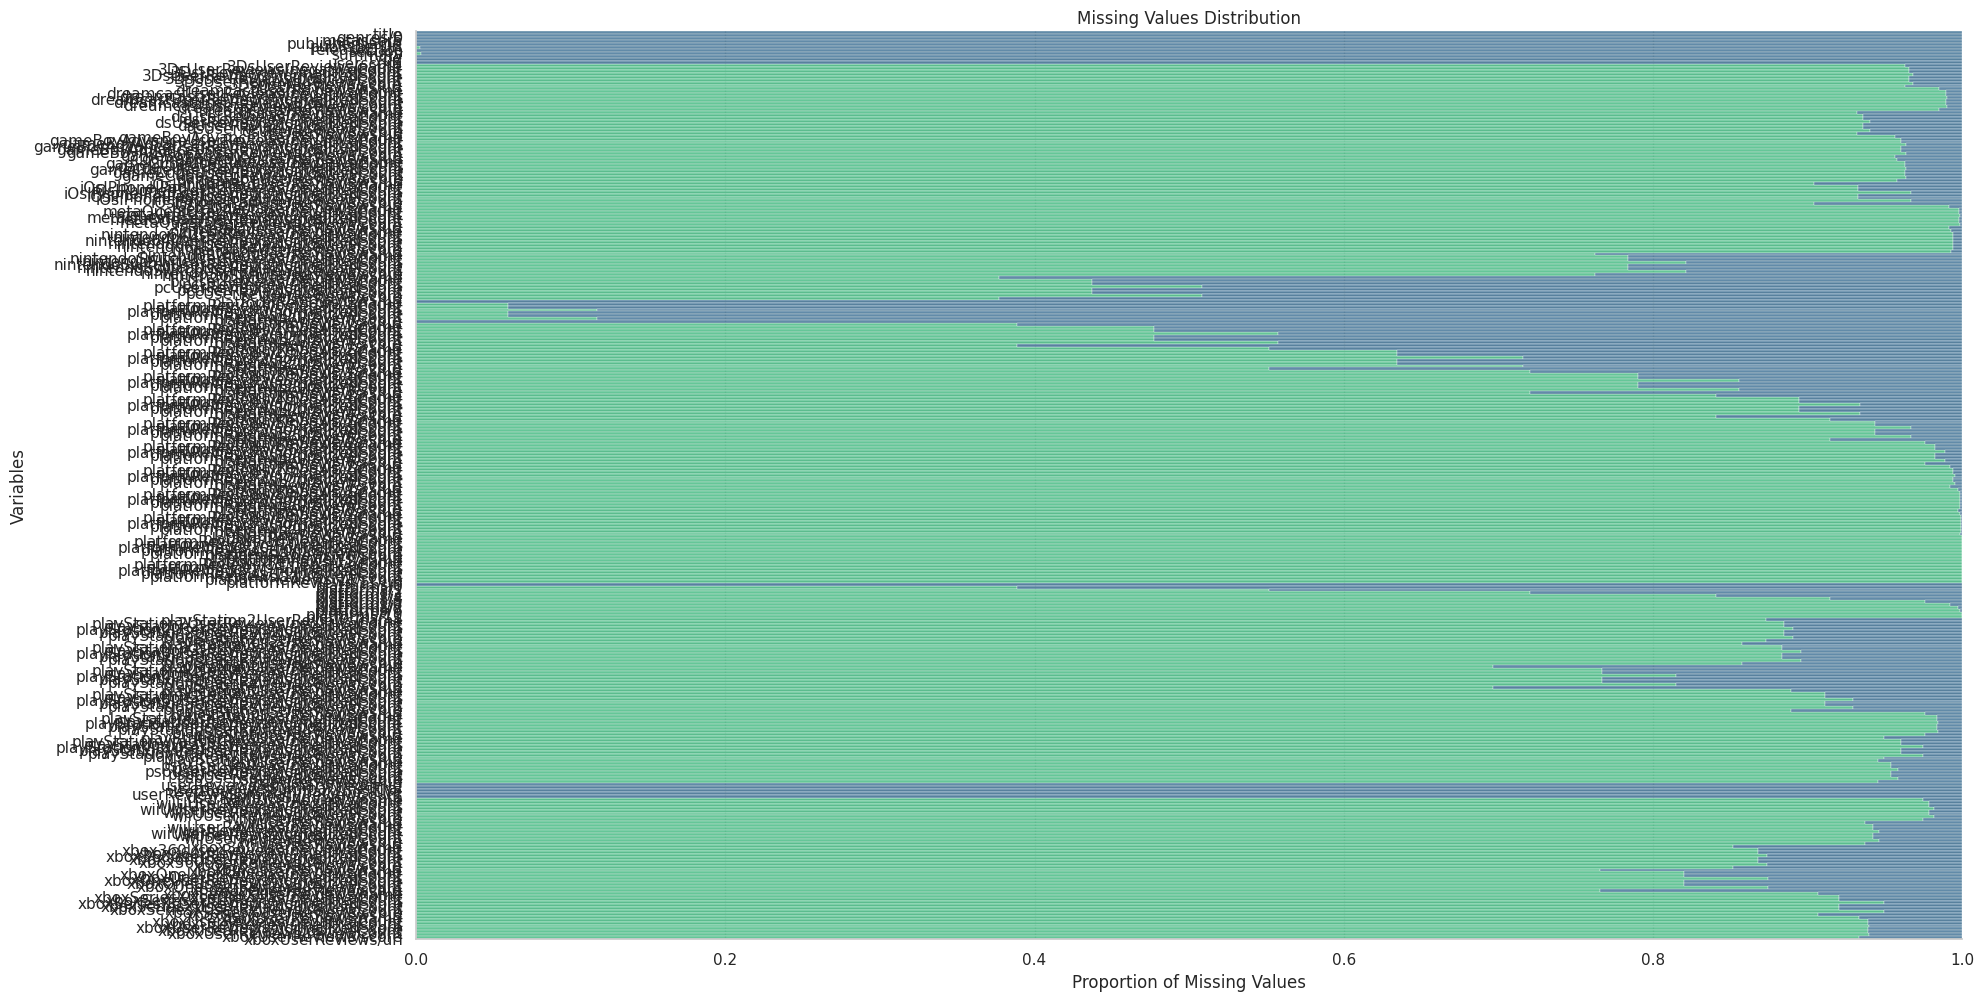

In [ ]:
# Graficamos para ver la distribución de los nulos
(dfgraf:= df.isnull().melt()).pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2,         # Reducir el aspect ratio para que sea más ancho
            height=10,        # Ajustar la altura del gráfico
            palette='viridis',# Cambiar la paleta de colores
            legend=False       # Desactivar la leyenda para ahorrar espacio
        )
    )
)

# Añadir etiquetas
plt.title('Missing Values Distribution')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Variables')
plt.show()



---



In [ ]:
# Contar valores nulos por variable
df.isnull().sum()

,0
title,0
genres/0,0
metascore,0
publisherName,2
publisherUrl,2
...,...
xboxUserReviews/normalizedScore,12622
xboxUserReviews/positiveCount,12613
xboxUserReviews/reviewCount,12613
xboxUserReviews/score,12622


In [ ]:
# Resumimos todo con un contador de valores nulos por cada variable
nulos_por_variable = df.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum() # Sumamos los valores booleanos para obtener la cantidad de nulos por variable
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0] # Filtramos solo las variables con al menos un valor nulo
lista_variables_con_nulos = variables_con_nulos.index.tolist() # Convertimos a lista

for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(df)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")

Variable: publisherName, Cantidad de Nulos: 2, Porcentaje: 0.01%
Variable: publisherUrl, Cantidad de Nulos: 2, Porcentaje: 0.01%
Variable: releaseDate, Cantidad de Nulos: 32, Porcentaje: 0.24%
Variable: summary, Cantidad de Nulos: 44, Porcentaje: 0.33%
Variable: 3DsUserReviews/name, Cantidad de Nulos: 12931, Porcentaje: 96.29%
Variable: 3DsUserReviews/negativeCount, Cantidad de Nulos: 12967, Porcentaje: 96.56%
Variable: 3DsUserReviews/neutralCount, Cantidad de Nulos: 12967, Porcentaje: 96.56%
Variable: 3DsUserReviews/normalizedScore, Cantidad de Nulos: 13003, Porcentaje: 96.83%
Variable: 3DsUserReviews/positiveCount, Cantidad de Nulos: 12967, Porcentaje: 96.56%
Variable: 3DsUserReviews/reviewCount, Cantidad de Nulos: 12967, Porcentaje: 96.56%
Variable: 3DsUserReviews/score, Cantidad de Nulos: 13003, Porcentaje: 96.83%
Variable: 3DsUserReviews/url, Cantidad de Nulos: 12931, Porcentaje: 96.29%
Variable: dreamcastUserReviews/name, Cantidad de Nulos: 13233, Porcentaje: 98.54%
Variable: dre



---



Antes de rellenar los valores nulos, disminuimos el foco a menos columnas para hacer un analisis mas detallado.

In [ ]:
# Obtener las 20 columnas con menor cantidad de nulos
missing_values = df.isnull().sum()
least_nulls = missing_values.sort_values().head(20)

# Mostrar las 20 columnas seleccionadas
columns_to_keep = least_nulls.index.tolist()
df_reduced = df[columns_to_keep]

# Devolver la lista de columnas seleccionadas para trabajar
columns_to_keep

['title',
 'genres/0',
 'metascore',
 'userReviewsSummary/score',
 'platformReviews/0/name',
 'platformReviews/0/url',
 'userscore',
 'platforms/0',
 'section',
 'type',
 'url',
 'userReviewsSummary/negative',
 'userReviewsSummary/reviewCount',
 'userReviewsSummary/positive',
 'userReviewsSummary/neutral',
 'publisherName',
 'publisherUrl',
 'releaseDate',
 'summary',
 'platformReviews/0/positiveCount']

Estos pasos reducen la dimensionalidad del dataset inicial (308 columnas) de forma razonada, priorizando las columnas con información más completa para los modelos que se definirán mas adelante.



---



### Variables y procesos



**title (Nombre del videojuego):**
No se debe rellenar. Es un identificador único, por lo tanto, si falta este valor probablemente sea mejor eliminar la fila por inconsistencia.

**genres/0 (Género principal del videojuego):**
Se rellena con la moda (el valor más frecuente). Como es una variable categórica, la moda es una opción razonable para imputar valores faltantes sin distorsionar la distribución general.

**metascore (Puntuación otorgada por críticos en Metacritic):**
Se rellena con la mediana. Dado que es un puntaje numérico que puede contener valores atípicos (críticas extremas), la mediana es menos sensible que la media y evita distorsionar el análisis.

**userScore (Puntuación promedio dada por los usuarios):**
Se rellena con la mediana. Al igual que el metascore, puede presentar sesgos por extremos. Usar la mediana asegura una imputación más robusta.

**releaseDate (Año de lanzamiento del videojuego):**
Se rellena con la moda. En general, los lanzamientos tienden a concentrarse en determinados años. Si hay empates, se puede optar por el valor más reciente.

**publisherName (Nombre de la empresa editora):**
Se rellena con la moda. Al ser una categoría, imputar con el valor más común ayuda a conservar consistencia sin alterar los análisis.

**platform (Plataforma donde se lanzó el videojuego):**
Se rellena con la moda. Dado que muchas plataformas son recurrentes, esto es útil y no introduce sesgos importantes.

**section/type (Tipo de contenido: juego, DLC, remasterización):**
Se rellena con la moda. Es una clasificación categórica y la imputación con el valor más común permite mantener una estructura coherente.

**userReviewsSummary/score (Puntaje promedio de reseñas de usuarios):**
Se rellena con la mediana. Al ser un valor numérico que resume percepción de usuarios, la mediana es adecuada si hay distribución asimétrica o outliers.

**userReviewsSummary/reviewCount (Cantidad total de reseñas de usuarios):**
Se rellena con 0, ya que la ausencia de valor generalmente implica que el producto no recibió reseñas.

**userReviewsSummary/positive (Reseñas positivas):**
Se rellena con 0. Al igual que reviewCount, un valor nulo suele indicar ausencia de reseñas, no un error.

**userReviewsSummary/neutral (Reseñas neutras):**
Se rellena con 0, bajo la misma lógica: ausencia de datos puede equivaler a “no aplicable” o “sin comentarios neutros”.

**userReviewsSummary/negative (Reseñas negativas):**
Se rellena con 0. La interpretación es equivalente: si no hay registro, se considera que no hubo reseñas de ese tipo.

**platformReviews/0/score (Puntaje en primera plataforma registrada):**
Se rellena con la mediana. Si se quiere analizar por plataforma, mantener este dato limpio mejora la segmentación sin alterar promedios generales.

**platformReviews/0/positiveCount (Cantidad de reseñas positivas en esa plataforma):**
Se rellena con 0. La ausencia de valor se interpreta como falta de reseñas, por lo que no conviene imputar con una media.

**platformReviews/0/name (Nombre de la plataforma en esa reseña):**
Se rellena con la moda. Es categórica y de ocurrencia frecuente, por lo tanto esta estrategia preserva la coherencia sin distorsión.

**platformReviews/0/url (URL a la reseña en esa plataforma):**
Se puede rellenar con "Sin URL" o directamente dejar nulo si el análisis no lo requiere, ya que no aporta valor analítico directo (opcional).

**publisherUrl (URL del editor):**
Se puede rellenar con "Sin URL" o dejar nulo. Solo aporta metadatos informativos, no afecta métricas o cálculos.

**summary (Resumen breve del videojuego):**
Se puede rellenar con "Sin resumen disponible" si se desea mantener la fila en el análisis. También es válido dejarlo nulo si no se utiliza en modelos o métricas.

**url (URL del videojuego):**
Se puede rellenar con "Sin URL" o dejar nulo. Como ocurre con publisherUrl, es informativo, no una variable predictiva.




---



In [ ]:
# Valores unicos de las variables categoricas
df_reduced.select_dtypes(include=['object']).apply(pd.unique)

,0
title,"[Tekken 3, Mass Effect 2, Baldur's Gate 3, The..."
genres/0,"[3D Fighting, Western RPG, Compilation, Linear..."
metascore,"[96, 97, 98, 99, 95, 94, 93, 92, 91, 90, 89, t..."
userReviewsSummary/score,"[8.9, 9.2, 8.8, 9.1, 5.8, 8.6, 8.5, 8, 7.7, 9,..."
platformReviews/0/name,"[PlayStation, PC, PlayStation 3, GameCube, Xbo..."
platformReviews/0/url,[https://www.metacritic.com/game/tekken-3/crit...
userscore,"[8.9, 9.2, 8.8, 9.1, 5.8, 8.6, 8.5, 8, 7.7, 9,..."
platforms/0,"[PlayStation, PC, Nintendo, Xbox, Dreamcast, X..."
section,"[PlayStation, Xbox, PC, Nintendo, Dreamcast, N..."
type,[game]




---



**Nombre de columnas del dataset reducido**

In [ ]:
df_reduced.columns

Index(['title', 'genres/0', 'metascore', 'userReviewsSummary/score',
       'platformReviews/0/name', 'platformReviews/0/url', 'userscore',
       'platforms/0', 'section', 'type', 'url', 'userReviewsSummary/negative',
       'userReviewsSummary/reviewCount', 'userReviewsSummary/positive',
       'userReviewsSummary/neutral', 'publisherName', 'publisherUrl',
       'releaseDate', 'summary', 'platformReviews/0/positiveCount'],
      dtype='object')

**Control de duplicados**

In [ ]:
df_reduced.duplicated().sum()

np.int64(0)



---



**Inspección de valores únicos en variables categóricas**

In [ ]:
columnas_categoricas = [
    'genres/0',
    'platforms/0',
    'type',
    'section',
    'publisherName'
]

for columna in columnas_categoricas:
    print(f"\n Valores únicos en '{columna}':")
    print(df_reduced[columna].dropna().unique())



 Valores únicos en 'genres/0':
['3D Fighting' 'Western RPG' 'Compilation' 'Linear Action Adventure'
 'Survival' 'FPS' 'Football Sim' '3D Platformer' 'Open-World Action'
 'Skating' 'JRPG' 'Auto Racing Sim' '2D Platformer' 'Action Adventure'
 'Action RPG' 'Visual Novel' '4X Strategy' 'Third Person Shooter' 'Arcade'
 'Management' 'Real-Time Strategy' '2D Fighting' 'Auto Racing' 'Rhythm'
 'Soccer Sim' 'Command RTS' 'Skiing' 'Sandbox' 'Hockey Sim' 'Application'
 'MMORPG' 'Future Racing' "2D Beat-'Em-Up" 'Basketball Sim' 'Roguelike'
 'Tennis' 'Tactical FPS' 'Turn-Based Tactics' 'Virtual Life'
 'Baseball Sim' 'Arcade Racing' 'Aircraft Combat Sim' 'Space Combat Sim'
 'Card Battle' 'Aircraft Sim' 'Party' 'Point-and-Click' 'Metroidvania'
 'Adventure' 'Vehicle Combat Sim' 'Golf' 'Action Puzzle' 'Basketball'
 'Dancing' 'Tycoon' 'Marine Combat Sim' 'Wrestling' 'Action'
 'Rail Shooter' 'MOBA' 'First-Person Adventure' "Top-Down Shoot-'Em-Up"
 'Turn-Based Strategy' 'Soccer Management' 'Stacking Puzzl

**Normalización**

In [ ]:
# Normalizar 'platforms/0'
df_reduced['platforms/0'] = df_reduced['platforms/0'].replace({
    'PlayStation 5': 'PlayStation', 'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation', 'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation', 'PlayStation Vita': 'PlayStation',
    'Xbox 360': 'Xbox', 'Xbox Series X': 'Xbox', 'Nintendo Switch': 'Nintendo',
    'Xbox One': 'Xbox', 'Xbox Series S/X': 'Xbox', 'Nintendo 64': 'Nintendo',
    'Nintendo Wii': 'Nintendo', 'Nintendo Wii U': 'Nintendo',
    'Nintendo 3DS': 'Nintendo', 'Nintendo DS': 'Nintendo', 'Nintendo GameCube': 'Nintendo',
    'Wii U': 'Nintendo', 'Wii': 'Nintendo', '3DS': 'Nintendo',
    'DS': 'Nintendo', 'GameCube': 'Nintendo'
})

# Normalizar 'section'
df_reduced['section'] = df_reduced['section'].replace({
    'PlayStation 5': 'PlayStation', 'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation', 'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation', 'PlayStation Vita': 'PlayStation',
    'Xbox 360': 'Xbox', 'Xbox Series X': 'Xbox', 'Nintendo Switch': 'Nintendo',
    'Xbox One': 'Xbox', 'Xbox Series S/X': 'Xbox', 'Nintendo 64': 'Nintendo',
    'Nintendo Wii': 'Nintendo', 'Nintendo Wii U': 'Nintendo',
    'Nintendo 3DS': 'Nintendo', 'Nintendo DS': 'Nintendo', 'Nintendo GameCube': 'Nintendo',
    'Wii U': 'Nintendo', 'Wii': 'Nintendo', '3DS': 'Nintendo',
    'DS': 'Nintendo', 'GameCube': 'Nintendo'
})

### Estrategias para Rellenar Valores Nulos (por tipo de dato)

In [ ]:
## A. Columnas numéricas → convertir y rellenar con mediana
columnas_mediana = ['metascore', 'userscore', 'userReviewsSummary/score']
for col in columnas_mediana:
    df_reduced[col] = df_reduced[col].replace('tbd', np.nan)
    df_reduced[col] = pd.to_numeric(df_reduced[col], errors='coerce')
    df_reduced[col] = df_reduced[col].fillna(df_reduced[col].median())

## B. Columnas categóricas → rellenar con moda
columnas_moda = ['genres/0', 'releaseDate', 'publisherName', 'platforms/0', 'section', 'type', 'platformReviews/0/name']
for col in columnas_moda:
    df_reduced[col] = df_reduced[col].fillna(df_reduced[col].mode()[0])

## C. Columnas de conteo → ausencia implica 0
columnas_cero = [
    'userReviewsSummary/reviewCount', 'userReviewsSummary/positive',
    'userReviewsSummary/neutral', 'userReviewsSummary/negative',
    'platformReviews/0/positiveCount'
]
for col in columnas_cero:
    df_reduced[col] = df_reduced[col].fillna(0)

## D. Columnas informativas (URLs, resúmenes)
df_reduced['url'] = df_reduced['url'].fillna('Sin URL')
df_reduced['platformReviews/0/url'] = df_reduced['platformReviews/0/url'].fillna('Sin URL')
df_reduced['publisherUrl'] = df_reduced['publisherUrl'].fillna('Sin URL')
df_reduced['summary'] = df_reduced['summary'].fillna('Sin resumen disponible')



---



### Revision

In [ ]:
# Validar limpieza
print("Valores únicos después de la limpieza:")
for columna in columnas_categoricas:
    print(f"{columna}:")
    print(df_reduced[columna].dropna().unique())
    print("-" * 50)

Valores únicos después de la limpieza:
genres/0:
['3D Fighting' 'Western RPG' 'Compilation' 'Linear Action Adventure'
 'Survival' 'FPS' 'Football Sim' '3D Platformer' 'Open-World Action'
 'Skating' 'JRPG' 'Auto Racing Sim' '2D Platformer' 'Action Adventure'
 'Action RPG' 'Visual Novel' '4X Strategy' 'Third Person Shooter' 'Arcade'
 'Management' 'Real-Time Strategy' '2D Fighting' 'Auto Racing' 'Rhythm'
 'Soccer Sim' 'Command RTS' 'Skiing' 'Sandbox' 'Hockey Sim' 'Application'
 'MMORPG' 'Future Racing' "2D Beat-'Em-Up" 'Basketball Sim' 'Roguelike'
 'Tennis' 'Tactical FPS' 'Turn-Based Tactics' 'Virtual Life'
 'Baseball Sim' 'Arcade Racing' 'Aircraft Combat Sim' 'Space Combat Sim'
 'Card Battle' 'Aircraft Sim' 'Party' 'Point-and-Click' 'Metroidvania'
 'Adventure' 'Vehicle Combat Sim' 'Golf' 'Action Puzzle' 'Basketball'
 'Dancing' 'Tycoon' 'Marine Combat Sim' 'Wrestling' 'Action'
 'Rail Shooter' 'MOBA' 'First-Person Adventure' "Top-Down Shoot-'Em-Up"
 'Turn-Based Strategy' 'Soccer Management


Al ver que se limpio el dataset de valores nulos, aplico nuevamente el grafico de distribucion de nulos para comprobarlo.

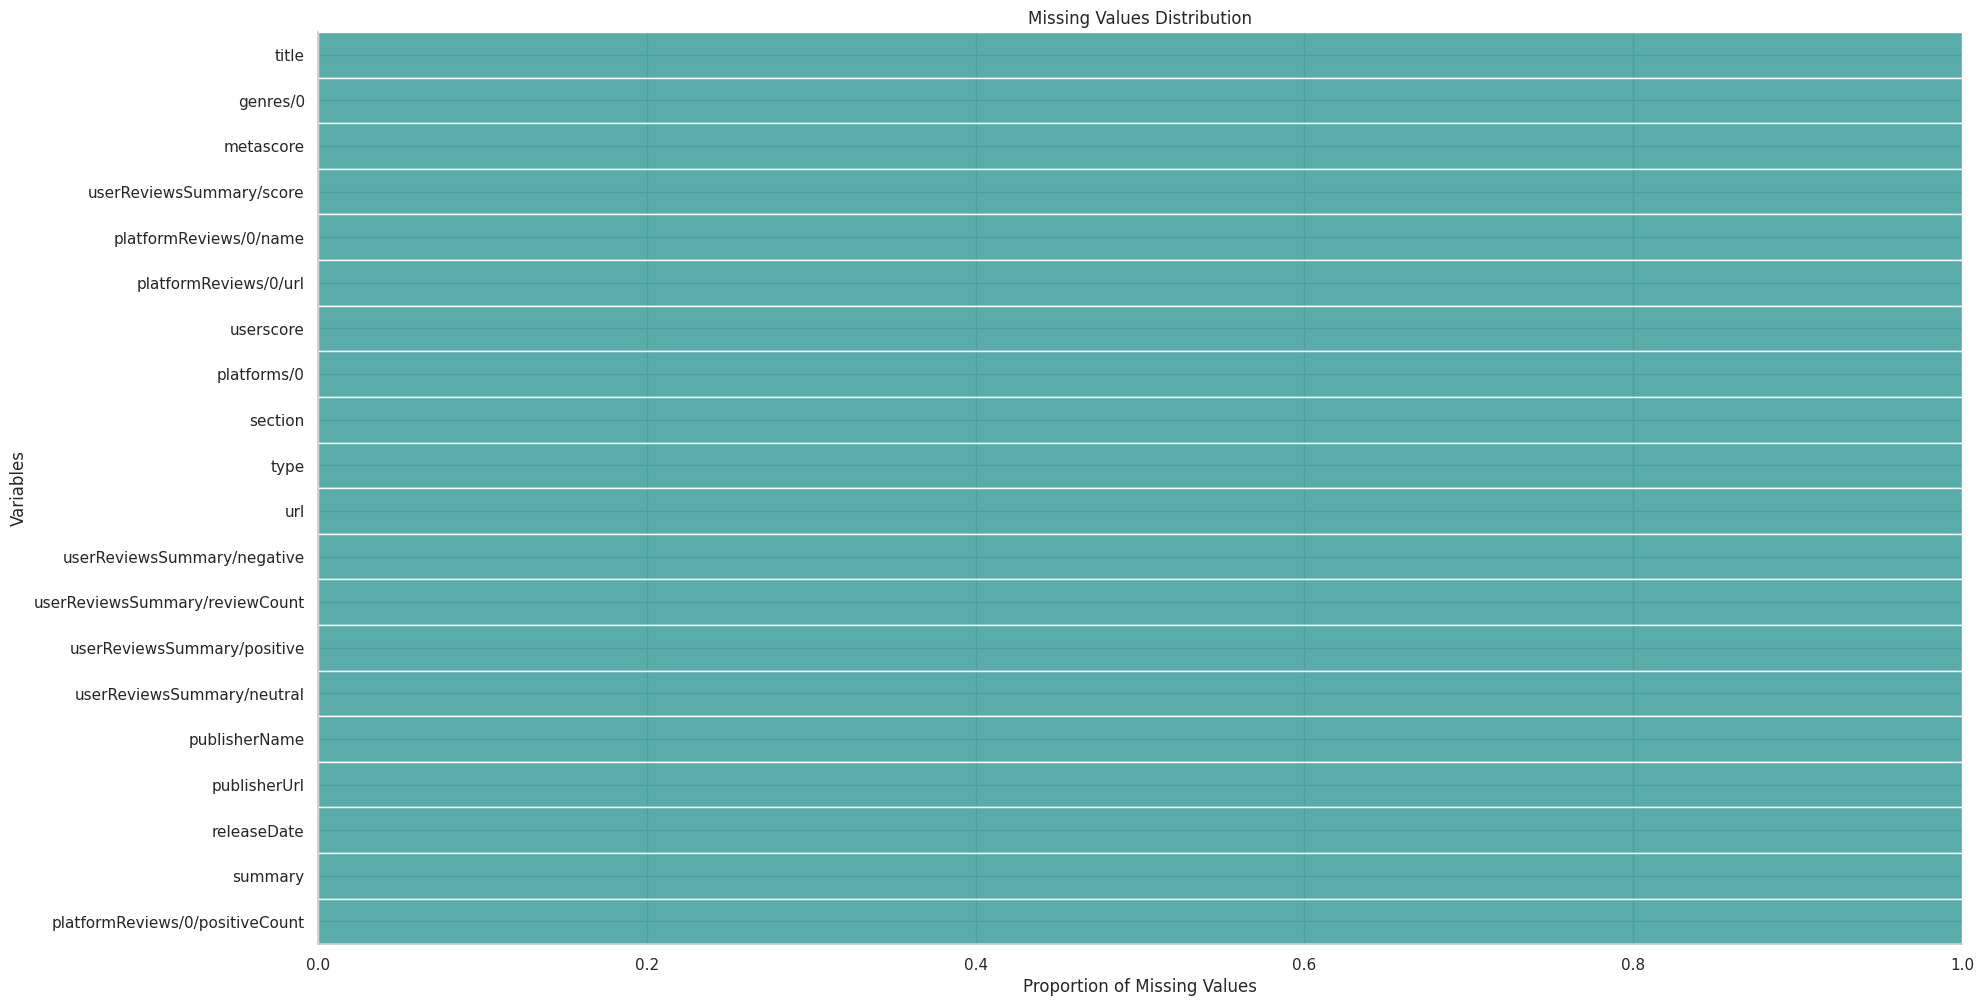

In [ ]:
# Graficamos para ver la distribución de los nulos
(df_reducedgraf:= df_reduced.isnull().melt()).pipe(
    lambda df_reduced: (
        sns.displot(
            data=df_reduced,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2,         # Reducir el aspect ratio para que sea más ancho
            height=10,        # Ajustar la altura del gráfico
            palette='viridis',# Cambiar la paleta de colores
            legend=False       # Desactivar la leyenda para ahorrar espacio
        )
    )
)

# Añadir etiquetas
plt.title('Missing Values Distribution')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Variables')
plt.show()

> Todos los valores nulos fueron eliminados correctamente.

## Glosario de Variables

### Variable // Descripcion

---
**title:**	Nombre del videojuego.

**genres/0:**	Género principal del videojuego.

**metascore:**	Puntuación otorgada por críticos en Metacritic (0-100).

**userScore:**	Puntuación promedio de usuarios.

**releaseDate:**	Año de lanzamiento del videojuego.

**publisherName:**	Nombre de la empresa editora.

**platform:**	Plataforma donde se lanzó el videojuego.

**userScore:**	Puntuación promedio dada por los usuarios.

**section/type:**	Tipo de contenido (juego, DLC, remasterización, etc.).

**userReviewsSummary/score:**	Puntaje promedio de reseñas de usuarios.

**userReviewsSummary/reviewCount:**	Cantidad total de reseñas de usuarios.

**userReviewsSummary/positive:**	Reseñas positivas.

**userReviewsSummary/neutral:**	Reseñas neutras.

**userReviewsSummary/negative:**	Reseñas negativas.

**platformReviews/0/score:**	Puntaje en primera plataforma registrada.

**platformReviews/0/positiveCount:**	Cantidad de reseñas positivas en esa plataforma.

**platformReviews/0/name:**	Nombre de la plataforma en esa reseña.

**platformReviews/0/url:**	URL a la reseña en esa plataforma.

**publisherUrl:**	URL del editor.

**summary:**	Resumen breve del videojuego.

**url:**	URL del videojuego.



---





---



# Graficas

## Distribución general de puntuaciones y plataformas

A continuación se analiza cómo se distribuyen los puntajes otorgados por los usuarios, así como las plataformas más comunes en el dataset.



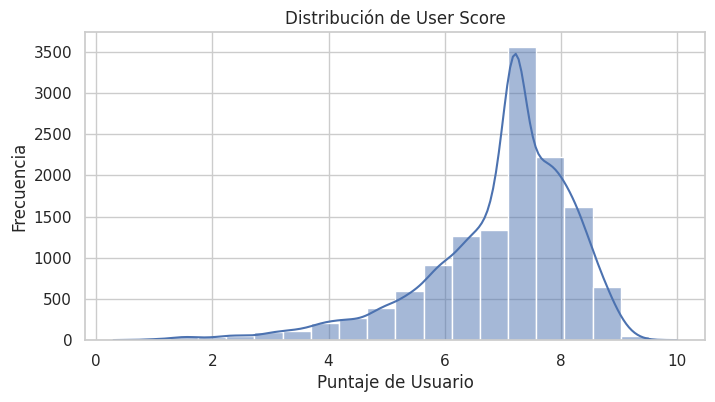

In [ ]:
# 1. Histograma de userScore
plt.figure(figsize=(8, 4))
sns.histplot(data=df_reduced, x='userscore', bins=20, kde=True)
plt.title('Distribución de User Score')
plt.xlabel('Puntaje de Usuario')
plt.ylabel('Frecuencia')
plt.show()

>Se observa una concentración de puntuaciones de usuario entre 6 y 8, lo que sugiere una tendencia a calificaciones positivas. La curva KDE permite visualizar mejor la distribución.

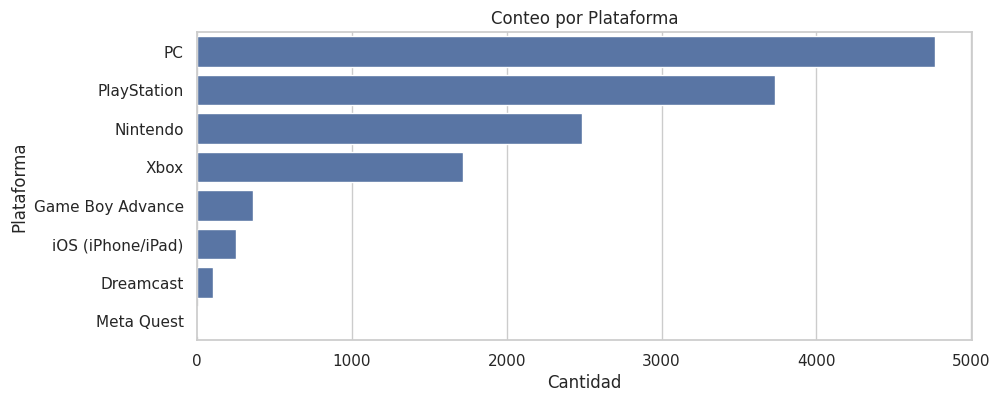

In [ ]:
# 2. Conteo de plataformas (platforms/0)
plt.figure(figsize=(10, 4))
sns.countplot(data=df_reduced, y='platforms/0', order=df_reduced['platforms/0'].value_counts().index)
plt.title('Conteo por Plataforma')
plt.xlabel('Cantidad')
plt.ylabel('Plataforma')
plt.show()





> Las plataformas más comunes en el dataset son PC, PlayStation y Xbox, lo que refleja una representación fuerte de consolas populares.

## Puntajes por tipo de contenido

Se analiza si existen diferencias significativas en los puntajes de usuario según el tipo de contenido (juego, DLC, remasterización, etc.).


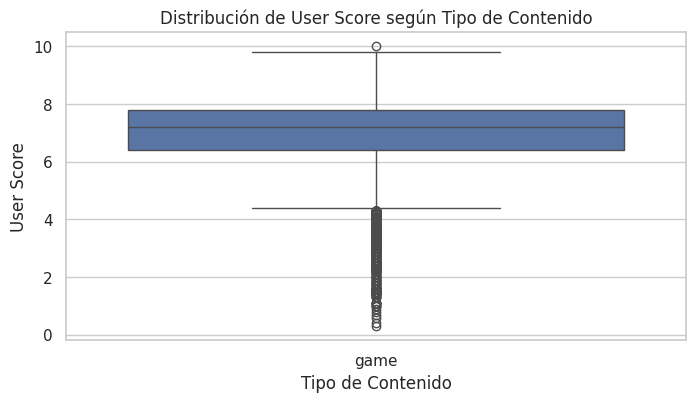

In [ ]:
# 3. Boxplot userScore vs. type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_reduced, x='type', y='userscore')
plt.title('Distribución de User Score según Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('User Score')
plt.show()

> Aunque el tipo predominante es 'game', se puede notar la presencia de valores atípicos y una mediana cercana a 7.5, indicando que los usuarios suelen valorar bien los contenidos, aunque hay una variabilidad notable.

## Relaciones entre variables numéricas

Se exploran relaciones entre los puntajes de usuario (`userScore`), los otorgados por la crítica (`metascore`) y los promedios de reseñas de usuarios (`userReviewsSummary/score`).


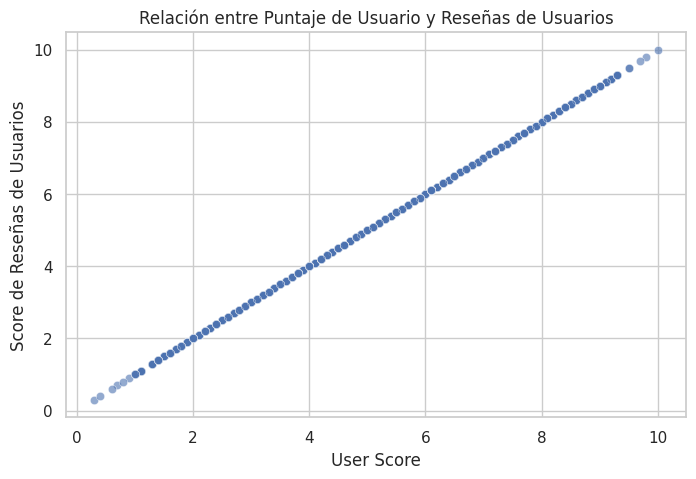

In [ ]:
# 4. Dispersión userScore vs. userReviewsSummary/score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_reduced, x='userscore', y='userReviewsSummary/score', alpha=0.6)
plt.title('Relación entre Puntaje de Usuario y Reseñas de Usuarios')
plt.xlabel('User Score')
plt.ylabel('Score de Reseñas de Usuarios')
plt.show()

> La relación entre los puntajes de usuarios y el promedio de reseñas es casi perfecta (correlación = 1.0), lo que sugiere que ambas métricas miden prácticamente lo mismo.

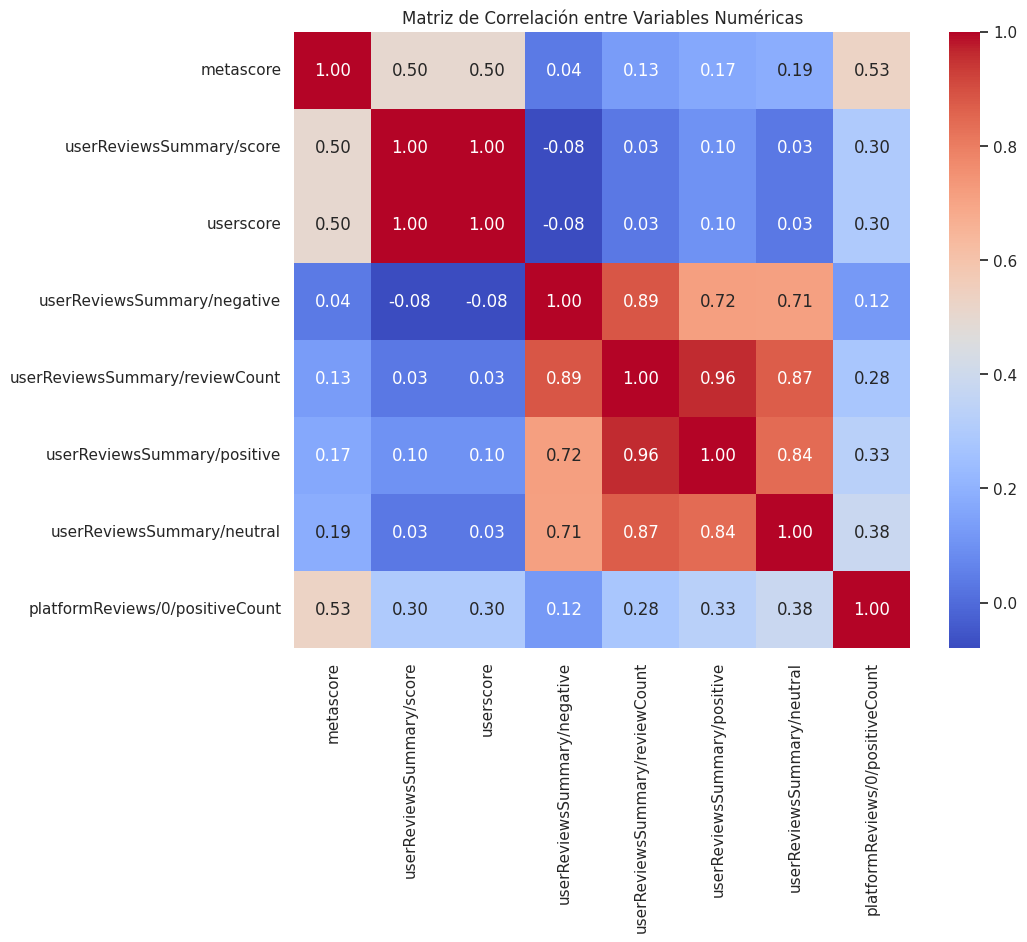

In [ ]:
# 5. Matriz de correlación
plt.figure(figsize=(10, 8))
numericas = df_reduced.select_dtypes(include='number')
correlacion = numericas.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

> - Las puntuaciones dadas por usuarios (`userscore`) y el promedio de reseñas de usuarios (`userReviewsSummary/score`) presentan una correlación casi perfecta (≈ 1.0), lo que sugiere que representan la misma percepción del juego y podrían fusionarse o seleccionarse una sola para modelado.
- `metascore` muestra una correlación más moderada con las demás métricas, aportando una visión distinta al análisis.
- Las reseñas positivas y neutrales tienen también alta correlación entre sí (> 0.8), posiblemente porque suelen crecer de forma conjunta en juegos con buena recepción.

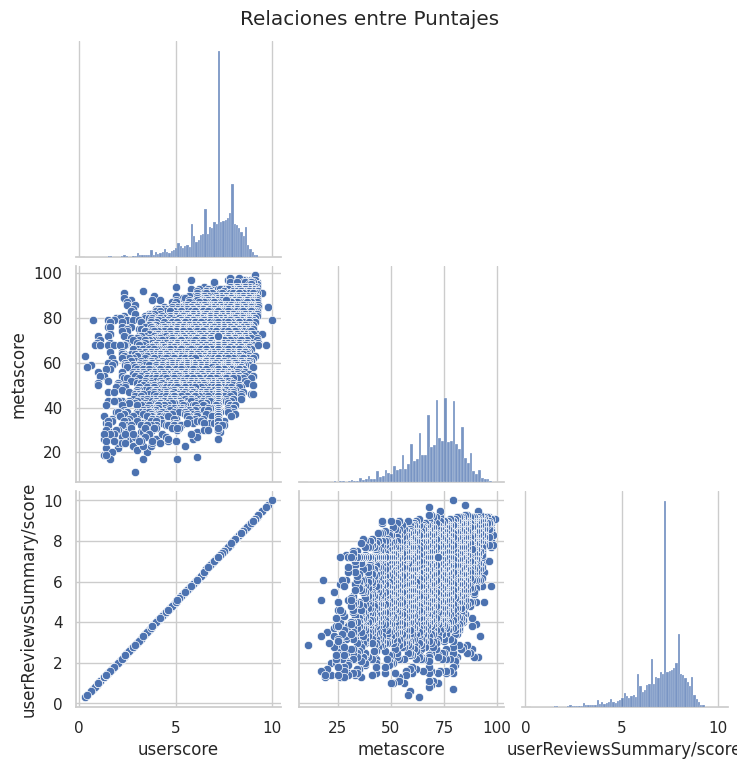

In [ ]:
# 6. Pairplot entre puntajes
sns.pairplot(df_reduced[['userscore', 'metascore', 'userReviewsSummary/score']], corner=True)
plt.suptitle('Relaciones entre Puntajes', y=1.02)
plt.show()

> Este gráfico de dispersión permite observar relaciones entre los distintos tipos de puntajes disponibles:
- Se aprecia una correlación positiva entre `userscore` y `metascore`, aunque con mucha dispersión.
- Existen grupos de datos donde los usuarios dan puntuaciones bajas a juegos con altos `metascore`, lo que podría reflejar diferencias de percepción entre críticos y jugadores.


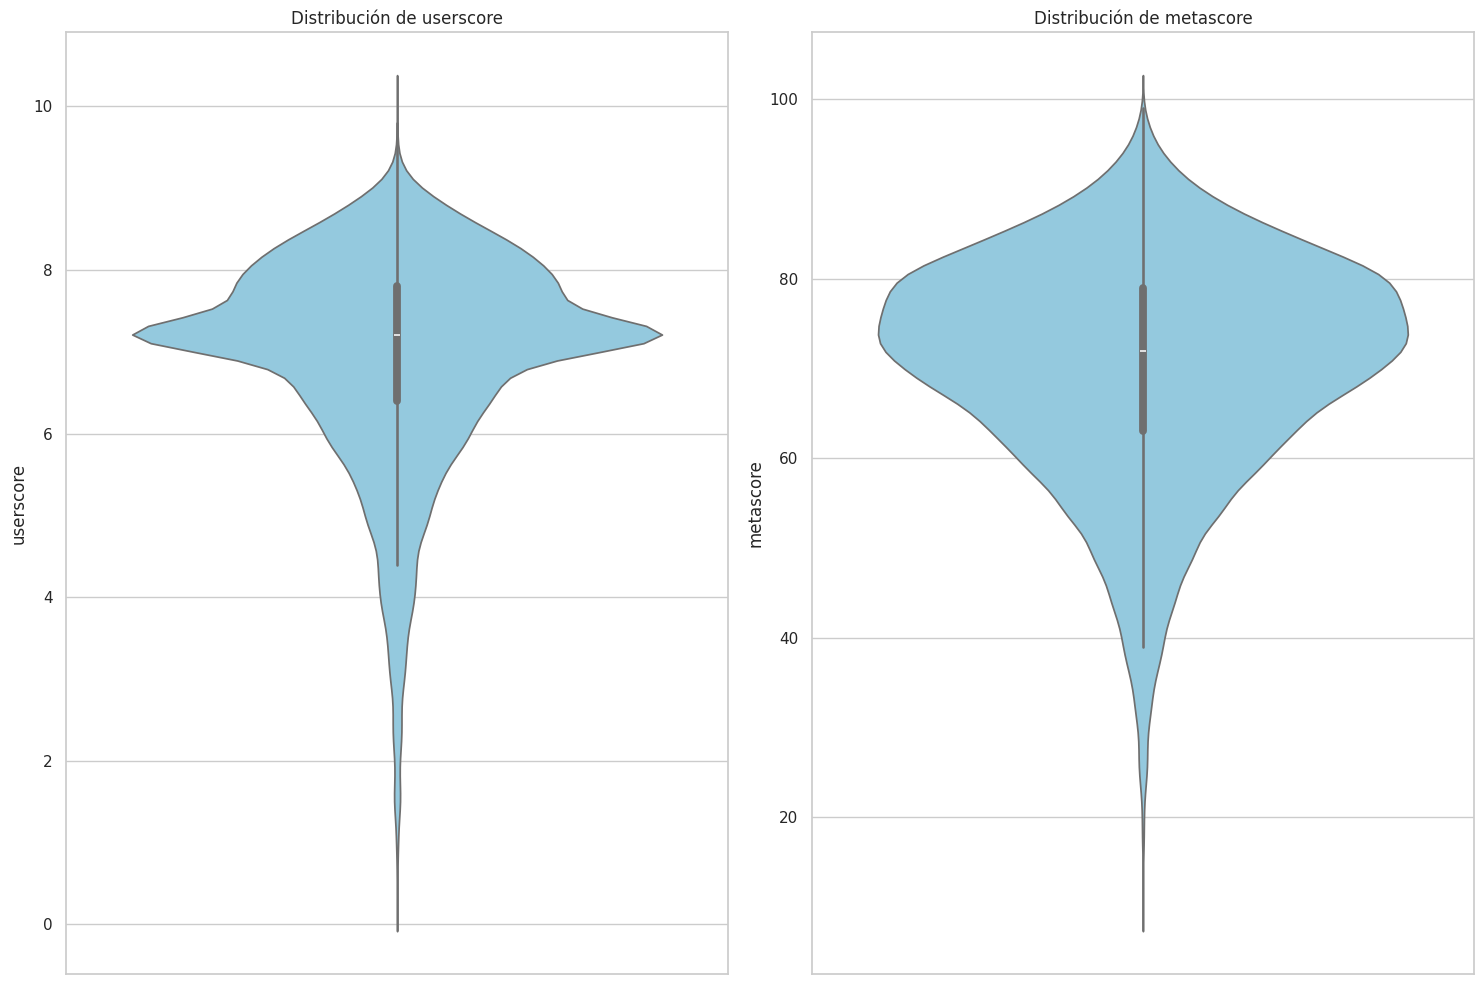

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['userscore', 'metascore']):
    plt.subplot(1, 2, i + 1)
    sns.violinplot(y=df_reduced[col], color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()



> - `userscore` tiene una distribución levemente bimodal, con concentración entre valores 7 y 8. Esto podría estar relacionado con una tendencia de los usuarios a calificar de forma más indulgente o polarizada.
- `metascore` se distribuye de forma más simétrica, con mayoría de juegos en el rango 70–80. La menor dispersión sugiere que los críticos aplican criterios más homogéneos.




---



# Preprocesamiento de Datos
Para preparar el dataset antes de aplicar técnicas de modelado o análisis avanzado, se realizaron las siguientes transformaciones:


## Codificación de variables categóricas


In [ ]:
# Preprocesamiento de Datos
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Codificación de variables categóricas
categorical = ['platform', 'genre', 'publisher', 'developer', 'rating']
label_encoder = LabelEncoder()

for col in categorical:
    if col in df_reduced.columns:
        df_reduced[col] = label_encoder.fit_transform(df_reduced[col].astype(str))

Las columnas categóricas como `platform`, `genre`, `publisher` y otras similares fueron codificadas utilizando `LabelEncoder`. Esta técnica convierte las etiquetas de texto en valores numéricos enteros, permitiendo que los algoritmos de machine learning puedan procesarlas adecuadamente.

In [ ]:
# Escalado de variables numéricas
numerical = ['userscore', 'metascore', 'userReviewsSummary/score',
             'userReviewsSummary/positive', 'userReviewsSummary/neutral',
             'userReviewsSummary/negative', 'userReviewsSummary/reviewCount']

scaler = StandardScaler()
df_reduced[numerical] = scaler.fit_transform(df_reduced[numerical])


Las variables numéricas como `userscore`, `metascore` y métricas derivadas de las reseñas de usuarios (`positive`, `neutral`, `reviewCount`, etc.) fueron escaladas con `StandardScaler`. Esto normaliza los valores para que tengan media 0 y desviación estándar 1, evitando que una variable con mayor rango (como un conteo de reseñas) domine el análisis frente a otras más acotadas.


In [ ]:
# Mostrar las primeras 5 filas
df_reduced.head()

,title,genres/0,metascore,userReviewsSummary/score,platformReviews/0/name,platformReviews/0/url,userscore,platforms/0,section,type,url,userReviewsSummary/negative,userReviewsSummary/reviewCount,userReviewsSummary/positive,userReviewsSummary/neutral,publisherName,publisherUrl,releaseDate,summary,platformReviews/0/positiveCount
0,Tekken 3,3D Fighting,2.072708,1.514129,PlayStation,https://www.metacritic.com/game/tekken-3/criti...,1.514129,PlayStation,PlayStation,game,https://www.metacritic.com/game/tekken-3,-0.015569,0.498232,0.777055,0.357239,Namco,https://www.metacritic.com/company/namco/,1998-04-29,"An ancient evil force has reawakened, attackin...",15.0
1,Mass Effect 2,Western RPG,2.072708,1.514129,PC,https://www.metacritic.com/game/mass-effect-2/...,1.514129,PC,Xbox,game,https://www.metacritic.com/game/mass-effect-2,0.120073,1.632128,2.450630,1.049777,Electronic Arts,https://www.metacritic.com/company/electronic-...,2010-01-26,The Mass Effect trilogy is a science fiction a...,54.0
2,Baldur's Gate 3,Western RPG,2.072708,1.748287,PC,https://www.metacritic.com/game/baldurs-gate-3...,1.748287,PC,PC,game,https://www.metacritic.com/game/baldurs-gate-3,1.536286,10.119183,14.872420,4.942317,Larian Studios Games,https://www.metacritic.com/company/larian-stud...,2023-08-03,"An ancient evil has returned to Baldur's Gate,...",111.0
3,The Orange Box,Compilation,2.072708,1.436077,PC,https://www.metacritic.com/game/the-orange-box...,1.436077,PC,Xbox,game,https://www.metacritic.com/game/the-orange-box,-0.011193,0.311156,0.484504,0.237836,EA Games,https://www.metacritic.com/company/ea-games/,2007-10-10,Games included in The Orange Box compilation: ...,34.0
4,Uncharted 2: Among Thieves,Linear Action Adventure,2.072708,1.436077,PlayStation 3,https://www.metacritic.com/game/uncharted-2-am...,1.436077,PlayStation,PlayStation,game,https://www.metacritic.com/game/uncharted-2-am...,0.448238,4.061823,5.938947,3.167191,SCEA,https://www.metacritic.com/company/scea/,2009-10-13,Fortune hunter Nathan Drake returns in Unchart...,105.0


# Modelado



---



## Objetivo del Modelado
Predecir el puntaje de los usuarios (userScore) usando información como el género, plataforma, desarrollador, reseñas y otras métricas disponibles.

In [ ]:
print(df_reduced.columns)


Index(['title', 'genres/0', 'metascore', 'userReviewsSummary/score',
       'platformReviews/0/name', 'platformReviews/0/url', 'userscore',
       'platforms/0', 'section', 'type', 'url', 'userReviewsSummary/negative',
       'userReviewsSummary/reviewCount', 'userReviewsSummary/positive',
       'userReviewsSummary/neutral', 'publisherName', 'publisherUrl',
       'releaseDate', 'summary', 'platformReviews/0/positiveCount'],
      dtype='object')


### Separación de features (X) y target (y)

Antes de entrenar el modelo, es fundamental asegurarnos de que todas las columnas predictoras (`X`) sean numéricas.

En este paso se eliminaron:
- Columnas no numéricas o irrelevantes como `title`, `url`, `releaseDate`, etc.
- Columnas con strings categóricos sin codificar como `genres/0`, `type`, `section`, `platforms/0` y `publisherName`.

In [ ]:
# Eliminar columnas no numéricas o irrelevantes para el modelo
columnas_a_excluir = [
    'userscore', 'title', 'url', 'releaseDate', 'summary',
    'platformReviews/0/url', 'platformReviews/0/name',
    'publishName', 'publisherUrl',
    'genres/0', 'type', 'section', 'platforms/0', 'publisherName'
]

# Seleccionar columnas predictoras y la variable objetivo
X = df_reduced.drop(columns=columnas_a_excluir, errors='ignore')
y = df_reduced['userscore']


# Verificación final: todas las columnas deben ser numéricas
print(X.select_dtypes(include='object').columns)  # debe devolver vacío

Index([], dtype='object')


## División en conjunto de entrenamiento y prueba


In [ ]:
from sklearn.model_selection import train_test_split

# División del dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Mostrar datos de *X*

In [ ]:
X

,metascore,userReviewsSummary/score,userReviewsSummary/negative,userReviewsSummary/reviewCount,userReviewsSummary/positive,userReviewsSummary/neutral,platformReviews/0/positiveCount
0,2.072708,1.514129,-0.015569,0.498232,0.777055,0.357239,15.0
1,2.072708,1.514129,0.120073,1.632128,2.450630,1.049777,54.0
2,2.072708,1.748287,1.536286,10.119183,14.872420,4.942317,111.0
3,2.072708,1.436077,-0.011193,0.311156,0.484504,0.237836,34.0
4,2.072708,1.436077,0.448238,4.061823,5.938947,3.167191,105.0
...,...,...,...,...,...,...,...
13424,-4.811442,-3.169026,0.255714,0.042843,-0.068091,-0.215895,0.0
13425,0.128948,0.187236,-0.066616,-0.132219,-0.142390,-0.255696,0.0
13426,-4.244512,-0.671343,-0.060782,-0.126498,-0.136817,-0.255696,0.0
13427,-4.163522,-4.339814,0.525539,0.136095,-0.099668,-0.120373,0.0


###Mostrar datos de *y*

In [ ]:
y

,userscore
0,1.514129
1,1.514129
2,1.748287
3,1.436077
4,1.436077
...,...
13424,-3.169026
13425,0.187236
13426,-0.671343
13427,-4.339814


###Mostrar datos de X_train

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10743 entries, 7065 to 7270
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metascore                        10743 non-null  float64
 1   userReviewsSummary/score         10743 non-null  float64
 2   userReviewsSummary/negative      10743 non-null  float64
 3   userReviewsSummary/reviewCount   10743 non-null  float64
 4   userReviewsSummary/positive      10743 non-null  float64
 5   userReviewsSummary/neutral       10743 non-null  float64
 6   platformReviews/0/positiveCount  10743 non-null  float64
dtypes: float64(7)
memory usage: 671.4 KB




---



## Entrenamiento de modelos


## Evaluación de los modelos

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n--- {nombre} ---")

    # Métricas
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)

    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")

    # Gráfico Real vs Predicho
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.3)

    # Limitar valores extremos
    min_val = np.percentile(y_true, 1)
    max_val = np.percentile(y_true, 99)
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')

    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(f"{nombre} - Real vs Predicho")
    plt.grid(True)
    plt.show()

    # Cálculo de errores
    errores = y_true - y_pred

    # Filtrar NaNs o infinitos
    errores = errores[np.isfinite(errores)]

    # Limitar el rango de errores extremos (percentiles)
    min_error = np.percentile(errores, 1)
    max_error = np.percentile(errores, 99)
    errores_filtrados = errores[(errores >= min_error) & (errores <= max_error)]

    plt.figure(figsize=(6, 4))
    sns.histplot(errores_filtrados, kde=True, bins=50)
    plt.title(f"{nombre} - Distribución de Errores")
    plt.xlabel("Error (y_real - y_predicho)")
    plt.grid(True)
    plt.show()



--- Regresión Lineal ---
MAE  : 0.00
RMSE : 0.00
R²   : 1.00


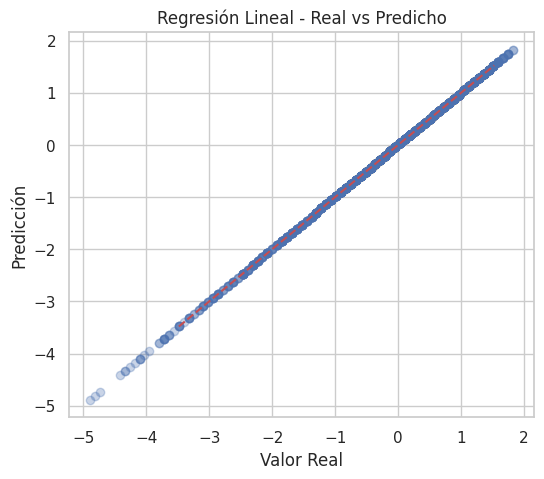

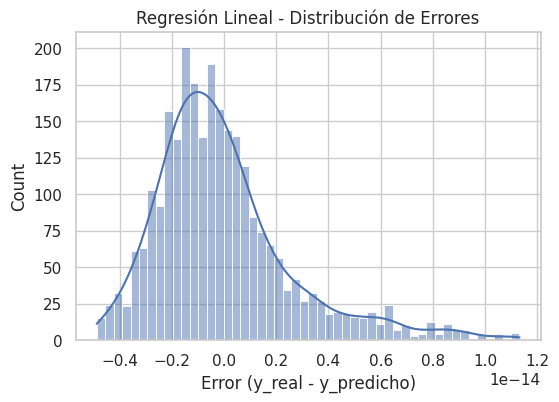


--- Random Forest ---
MAE  : 0.00
RMSE : 0.00
R²   : 1.00


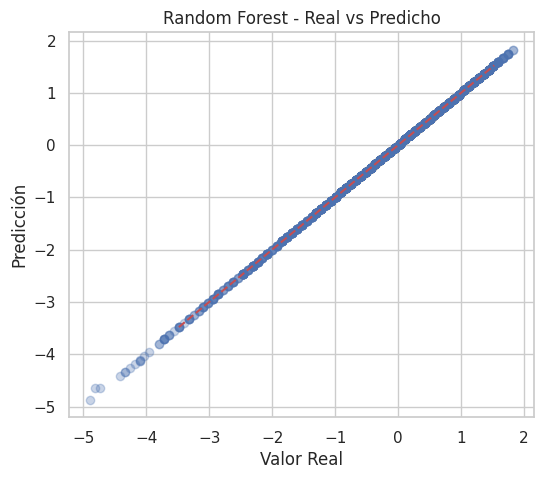

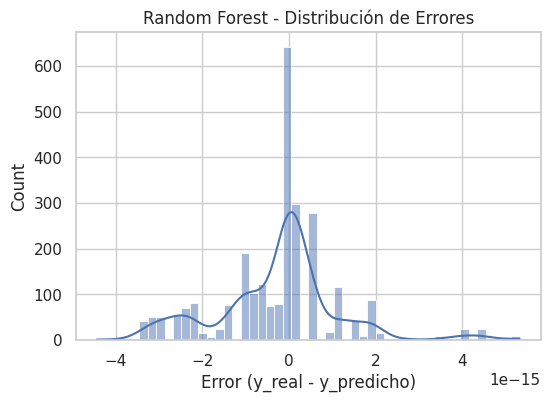


--- KNN ---
MAE  : 0.08
RMSE : 0.18
R²   : 0.97


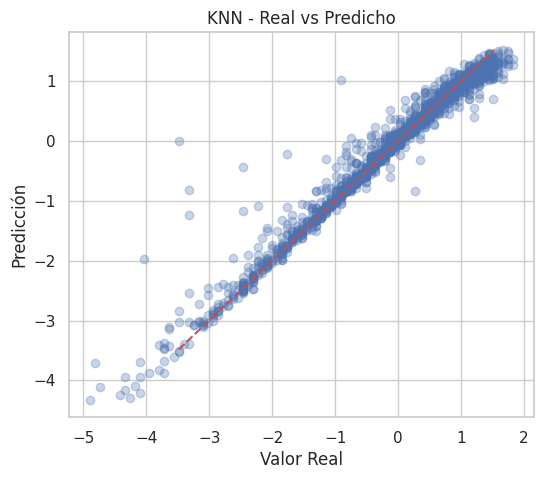

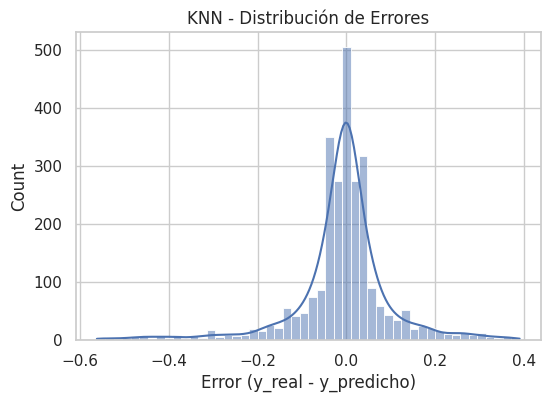


--- Decision Tree ---
MAE  : 0.00
RMSE : 0.01
R²   : 1.00


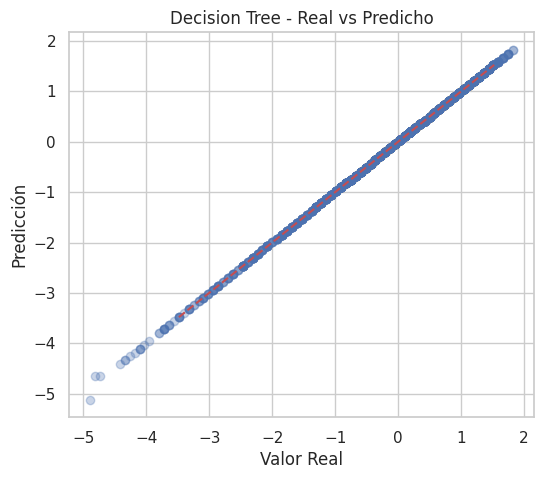

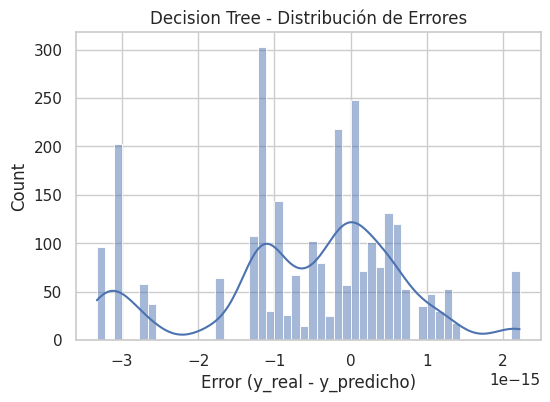


--- Gradient Boosting ---
MAE  : 0.00
RMSE : 0.00
R²   : 1.00


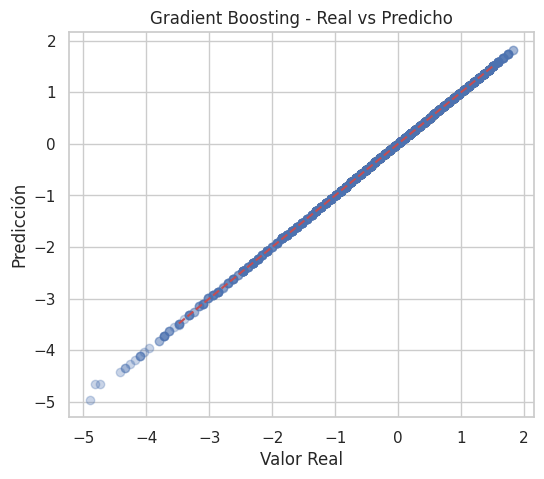

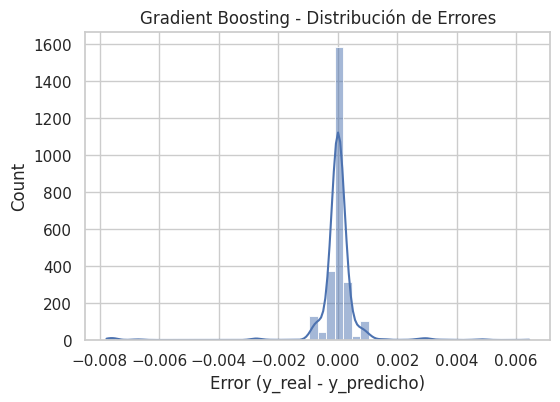


--- XGBoost ---
MAE  : 0.00
RMSE : 0.01
R²   : 1.00


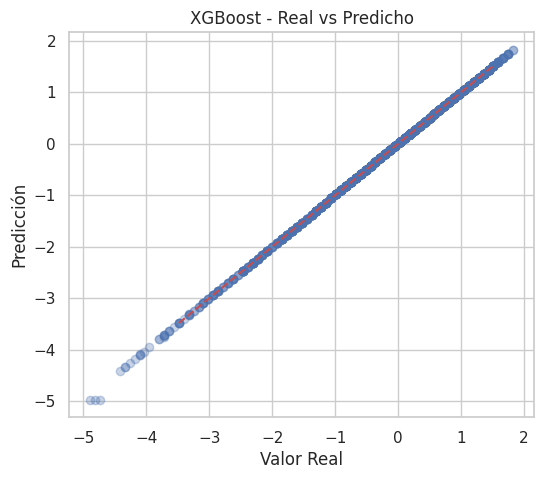

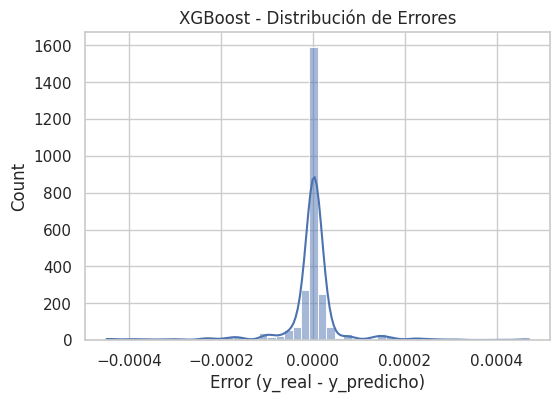


--- Validación cruzada (R² con cv=5) ---
Regresión Lineal     | R² promedio: 1.0000 | Desviación: 0.0000
Random Forest        | R² promedio: 1.0000 | Desviación: 0.0000
KNN                  | R² promedio: 0.9198 | Desviación: 0.0831
Decision Tree        | R² promedio: 0.9999 | Desviación: 0.0001
Gradient Boosting    | R² promedio: 1.0000 | Desviación: 0.0000
XGBoost              | R² promedio: 1.0000 | Desviación: 0.0001


In [ ]:
# ============================
# Librerías necesarias
# ============================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# ============================
# Lista para almacenar resultados de validación cruzada
# ============================
modelos = []

# ============================
# 1. Regresión Lineal
# ============================
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)
evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
modelos.append((modelo_lr, "Regresión Lineal"))

# ============================
# 2. Random Forest
# ============================
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
modelos.append((modelo_rf, "Random Forest"))

# ============================
# 3. KNN
# ============================
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)
evaluar_modelo("KNN", y_test, y_pred_knn)
modelos.append((modelo_knn, "KNN"))

# ============================
# 4. Árbol de Decisión
# ============================
modelo_dt = DecisionTreeRegressor(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)
evaluar_modelo("Decision Tree", y_test, y_pred_dt)
modelos.append((modelo_dt, "Decision Tree"))

# ============================
# 5. Gradient Boosting
# ============================
modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_test)
evaluar_modelo("Gradient Boosting", y_test, y_pred_gb)
modelos.append((modelo_gb, "Gradient Boosting"))

# ============================
# 6. XGBoost
# ============================
modelo_xgb = XGBRegressor(random_state=42)
modelo_xgb.fit(X_train, y_train)
y_pred_xgb = modelo_xgb.predict(X_test)
evaluar_modelo("XGBoost", y_test, y_pred_xgb)
modelos.append((modelo_xgb, "XGBoost"))

# ============================
# Validación cruzada para todos los modelos
# ============================
print("\n--- Validación cruzada (R² con cv=5) ---")
for modelo, nombre in modelos:
    scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    print(f"{nombre:20s} | R² promedio: {scores.mean():.4f} | Desviación: {scores.std():.4f}")




---



# Conclusiones Finales



- Se exploraron 13.429 juegos con 20 variables clave.
- Las plataformas y géneros muestran diferencias claras en los puntajes.
- Se observa una correlación moderada entre críticas de usuarios y profesionales.
- El año de lanzamiento no presenta una tendencia fuerte, pero sí un leve sesgo hacia juegos más recientes.



## Recomendaciones

- Para desarrolladores: enfocar esfuerzos en géneros populares como RPG o plataformas exitosas como PC.
- Para jugadores: considerar tanto `userScore` como `metascore` al elegir.

---


## Limitaciones



- No se cuenta con información de ventas.
- Algunas plataformas tienen baja representación en el dataset.

---



## Futuras Extensiones

- Entrenar un modelo de regresión para predecir `metascore`.
- Integrar datos de Steam o ventas comerciales externas.
